In [1]:
import pandas as pd

# Data Dictionary

- **FishID** (String): The Unique ID of assigned to each fish. The first to places indicate LT for the fish species common name: Lake Trout. The remaining three digits are the unique number for the fish. Some fish ids are preceded by LLC. This comes from a previous method of labeling that included the lake name, Little Lake Clark or LLC, in the fish id instead of a seperate field.
- **ReplicateID** (String): Unique identifier assigned to the replicate measurement transect. First five places are fish ID. Last place reflects transect letter. Some otoliths are labeled with a number after the fishID and a period.
- **Axis** (String, either "S" or "L"): Categorical assignment of the growth transect along which measurements of ech annual growth increments were made. "S" denotes that measurements were made long the short axis on the dorsal side of the otolith immediately adjcent to the suculus from the nucleus toward the proximal edge. "L" indicates that measurements were made along the long axis of the otolith from the nucleus toward either the dorsal or ventral.
- **Lake** (String, lake within Lake Clark National Park and Preserve): The name of the lake where the fish was captured.
- **Year** (Integer, 1979 - 2012, years): The year of the growth increment.
- **Age** (Integer, 1 - 29, years): Age of the fish at the time of the increment formation.
- **Width** (Float, 0.013 - 0.186, milimeters): The width of annual growth invrement.

## Data Quality

- **Accuracy**: All attributes were spot checked and data was plotted to compare visually. Outliers were confirmed against images of otolith growth.
- **Consistency**: measurements were taken from the otolith edge toward the center of the otolith.
- **Completelness**: 171 of the 251 lake trout caught were not included because the growth increments were not clear enough to measure.
- **Methodology**: Trout were captured from seven lakes in Lake Clark NPP in Southwest Alaska. They were captured using variable mesh floating and sinking gillnets or hook and line sampling in 2004 and 2011–2013 during the summer (June–September). Otolith increments were measured using the caliper function in Image Pro Premier software (Media Cybernetics, Silver Spring, MD).

In [2]:
df = pd.read_csv("./lakeTrout_otolithGrowth_LakeClarkNP_vonBiela_1979_2012.csv")

In [3]:
df

,FishID,ReplicateID,Axis,Lake,Year,Age,Width
0,LLC_LT028,LT028A,S,Little Lake Clark,1987,4,0.048
1,LLC_LT028,LT028A,S,Little Lake Clark,1988,5,0.038
2,LLC_LT028,LT028A,S,Little Lake Clark,1989,6,0.046
3,LLC_LT028,LT028A,S,Little Lake Clark,1990,7,0.037
4,LLC_LT028,LT028A,S,Little Lake Clark,1991,8,0.040
...,...,...,...,...,...,...,...
2398,LT0105,LT105B,L,Telaquana,1997,13,0.062
2399,LT0105,LT105B,L,Telaquana,1998,14,0.045
2400,LT0105,LT105B,L,Telaquana,1999,15,0.037
2401,LT0105,LT105B,L,Telaquana,2000,16,0.035


In [4]:
df.shape

(2403, 7)

In [5]:
df.head()

,FishID,ReplicateID,Axis,Lake,Year,Age,Width
0,LLC_LT028,LT028A,S,Little Lake Clark,1987,4,0.048
1,LLC_LT028,LT028A,S,Little Lake Clark,1988,5,0.038
2,LLC_LT028,LT028A,S,Little Lake Clark,1989,6,0.046
3,LLC_LT028,LT028A,S,Little Lake Clark,1990,7,0.037
4,LLC_LT028,LT028A,S,Little Lake Clark,1991,8,0.040


In [6]:
df.tail()

,FishID,ReplicateID,Axis,Lake,Year,Age,Width
2398,LT0105,LT105B,L,Telaquana,1997,13,0.062
2399,LT0105,LT105B,L,Telaquana,1998,14,0.045
2400,LT0105,LT105B,L,Telaquana,1999,15,0.037
2401,LT0105,LT105B,L,Telaquana,2000,16,0.035
2402,LT0105,LT105B,L,Telaquana,2001,17,0.030


In [7]:
# Making column names lowercase for consistency
df.columns = [x.lower() for x in df.columns.to_list()]

In [8]:
df.columns

Index(['fishid', 'replicateid', 'axis', 'lake', 'year', 'age', 'width'], dtype='object')

In [9]:
duplicates = df[df.duplicated()]

duplicates

,fishid,replicateid,axis,lake,year,age,width
1199,LT0126,LT126.2B,S,Lake Clark,2006,10,0.028
1205,LT0126,LT126.2B,S,Lake Clark,2009,13,0.035
2002,LT0223,LT223.2A,S,Lachbuna,2005,13,0.046
2006,LT0223,LT223.2A,S,Lachbuna,2007,15,0.038


In [10]:
# Dropping duplicates that may have resulted from multiple rows being entered multiple times, either by people or an automatic system
df.drop_duplicates()

,fishid,replicateid,axis,lake,year,age,width
0,LLC_LT028,LT028A,S,Little Lake Clark,1987,4,0.048
1,LLC_LT028,LT028A,S,Little Lake Clark,1988,5,0.038
2,LLC_LT028,LT028A,S,Little Lake Clark,1989,6,0.046
3,LLC_LT028,LT028A,S,Little Lake Clark,1990,7,0.037
4,LLC_LT028,LT028A,S,Little Lake Clark,1991,8,0.040
...,...,...,...,...,...,...,...
2398,LT0105,LT105B,L,Telaquana,1997,13,0.062
2399,LT0105,LT105B,L,Telaquana,1998,14,0.045
2400,LT0105,LT105B,L,Telaquana,1999,15,0.037
2401,LT0105,LT105B,L,Telaquana,2000,16,0.035


In [11]:
# display number of unique fish being studied by getting nuber of unique fish IDs
df['fishid'].nunique()

80

In [12]:
df.describe()

,year,age,width
count,2403.000000,2403.000000,2403.000000
mean,2001.590096,10.240117,0.042735
std,5.833994,4.617711,0.020493
min,1979.000000,1.000000,0.013000
25%,1998.000000,7.000000,0.028000
50%,2002.000000,10.000000,0.038000
75%,2006.000000,13.000000,0.052000
max,2012.000000,29.000000,0.186000


.describe() output alligns properly with min and max values in data dictionary

In [13]:
df['age'].min()

1

In [14]:
df['age'].max()

29

In [15]:
df['year'].value_counts()

2001    173
2002    165
2000    160
1999    142
2006    139
2007    139
2008    137
2005    137
2003    135
2004    131
2009    127
1998    126
1997    100
1996     89
2010     83
1995     68
2011     60
1994     57
1993     48
1992     39
1991     32
1990     26
1989     19
1988     15
2012     13
1987     12
1986      8
1985      4
1984      4
1983      4
1982      4
1981      3
1980      2
1979      2
Name: year, dtype: int64

<AxesSubplot:>

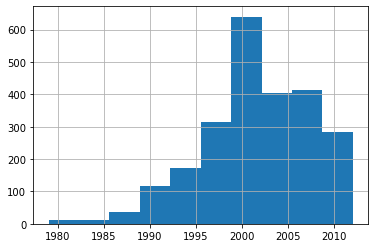

In [16]:
df['year'].hist()

# value_counts vs hist

- value_counts: value_counts can be hard to with a large number of unique values, but it is much better for getting accurate counts for each value. value counts also gives data types
- hist: hist does not provide accurate counts for any of the particular values, or a list of values, but it does give a much better idea of the general distribution of values

<AxesSubplot:>

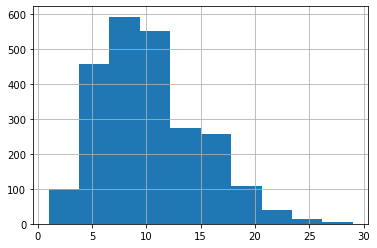

In [17]:
df['age'].hist()

<AxesSubplot:>

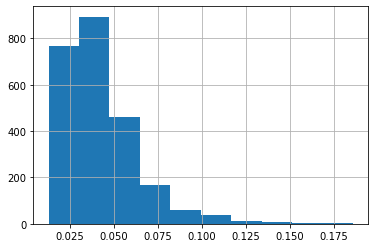

In [18]:
df['width'].hist()

In [19]:
df['lake'].value_counts()

Telaquana            431
Kontrashibuna        409
Portage              373
Fishtrap             358
Lake Clark           331
Lachbuna             199
Little Lake Clark    161
Kijik                141
Name: lake, dtype: int64

In [20]:
# used website https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/ for ideas on how to create new dataframe
data = {'lake':df['lake'].to_list(),
       'fish_count':df['fishid'].to_list()}
lake_fish_count_df = pd.DataFrame(data)

In [21]:
lake_fish_count_df

,lake,fish_count
0,Little Lake Clark,LLC_LT028
1,Little Lake Clark,LLC_LT028
2,Little Lake Clark,LLC_LT028
3,Little Lake Clark,LLC_LT028
4,Little Lake Clark,LLC_LT028
...,...,...
2398,Telaquana,LT0105
2399,Telaquana,LT0105
2400,Telaquana,LT0105
2401,Telaquana,LT0105


In [22]:
lake_fish_count_df.drop_duplicates()

,lake,fish_count
0,Little Lake Clark,LLC_LT028
44,Little Lake Clark,LLC_LT033
79,Little Lake Clark,LLC_LT036
99,Little Lake Clark,LLC_LT039
122,Little Lake Clark,LLC_LT040
...,...,...
2160,Portage,LT0233
2205,Portage,LT0235
2260,Portage,LT0238
2320,Portage,LT0245


In [23]:
lake_fish_count_df = lake_fish_count_df.groupby('lake').count()

In [24]:
lake_fish_count_df.to_csv('lake_fish_count.csv')

Step 1.3.5 using only python:

In [3]:
import csv

In [15]:
lakes = {}

In [16]:
with open('lakeTrout_otolithGrowth_LakeClarkNP_vonBiela_1979_2012.csv', newline='') as laketroutcsv:
    csvreader = csv.reader(laketroutcsv)
    next(csvreader)
    for row in csvreader:
        if row[3] in lakes:
            lakes[row[3]] += 1
        else:
            lakes[row[3]] = 1

In [18]:
lakes

In [18]:
#still need to finish annotating file and write the lake value counts to a csv

{'Little Lake Clark': 161,
 'Kijik': 141,
 'Portage': 373,
 'Telaquana': 431,
 'Kontrashibuna': 409,
 'Lake Clark': 331,
 'Fishtrap': 358,
 'Lachbuna': 199}

Not exceptionally dificult to do step 1.3.5 with pure python, but I can see how some of the other steps could be more difficult.